Part 1: The Ideal Case
It would take 28.55686245854129 seconds for the mass to reach the bottom of the shaft with no drag.
Numerical time to reach the bottom: 28.556862458541282 seconds


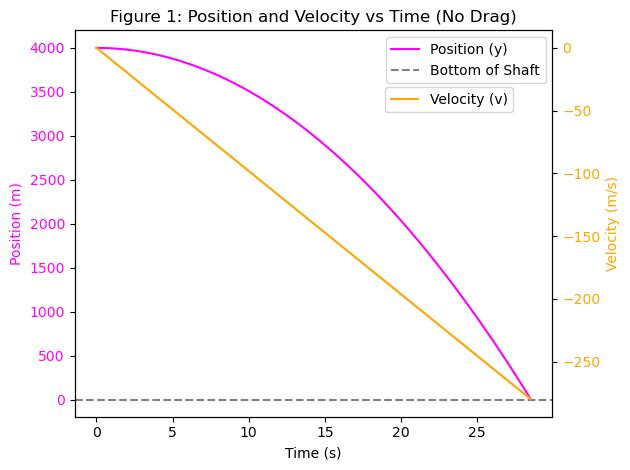

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.integrate import solve_ivp 
import math

print("Part 1: The Ideal Case")

g0 = 9.81
v0 = 0 
y = 4000
t_analytical = math.sqrt((2*y)/g0)
y0 = 4000
alpha = 0
gamma = 0

# Question 1:

print(f"It would take {t_analytical} seconds for the mass to reach the bottom of the shaft with no drag.") 

# Question 2:

def system(t,z):
    y,v=z
    dydt=v
    dvdt = -g0 - alpha *v**gamma
    return [dydt,dvdt]

def hit_bottom(t, z): 
    return z[0] 
hit_bottom.terminal = True 
hit_bottom.direction = -1

z0 = [y0, v0] 

t_span = (0,100) 
t_eval = np.linspace(0,100,1000) 

# Question 3:

soln = solve_ivp(system, t_span, z0, t_eval=t_eval, events = hit_bottom)
t = soln.t 
y = soln.y[0] 
v = soln.y[1] 
t_numerical = soln.t_events[0][0]
print(f"Numerical time to reach the bottom: {t_numerical} seconds")

fig, ax1 = plt.subplots() 
ax1.plot(t,y, label = "Position (y)", color = 'magenta') 
ax1.axhline(0, color = 'gray', linestyle='--', label='Bottom of Shaft')
ax1.set_xlabel("Time (s)") 
ax1.set_ylabel("Position (m)", color = 'magenta')
ax1.tick_params(axis='y', labelcolor='magenta')
ax1.set_title("Figure 1: Position and Velocity vs Time (No Drag)") 
ax1.legend(loc='upper right') ; 

ax2 = ax1.twinx() 
ax2.plot(t, v, label="Velocity (v)", color='orange')
ax2.set_ylabel("Velocity (m/s)", color='orange') 
ax2.tick_params(axis='y', labelcolor='orange')
ax2.legend(loc='center left', bbox_to_anchor=(0.635,0.82));  

fig.tight_layout() 

Part 2: Including Drag and a Variable g
Time to hit bottom: 28.55836042291948 seconds


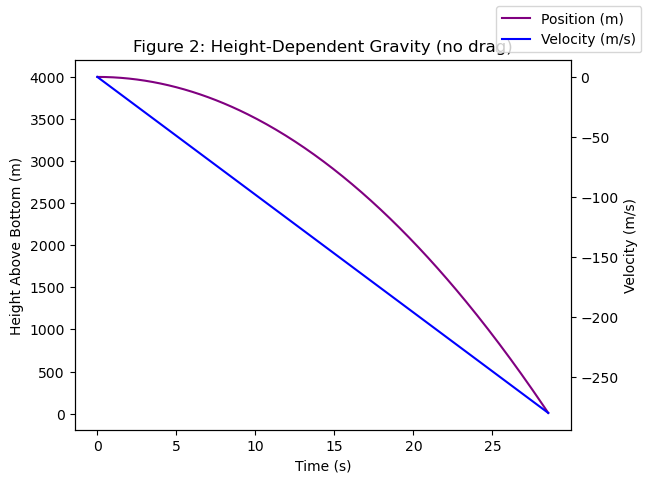

In [2]:
print("Part 2: Including Drag and a Variable g") 
r_earth = 6.3781*10**6
terminal_v=50
alpha = g0 / terminal_v**2
gamma = 2
depth=4000

def grav(r):
    return g0 * (r/r_earth)

def equations(t,state):
    y,v = state 
    dydt=v 
    dvdt= -grav(y) 
    return [dydt, dvdt]

r0 = r_earth
v0=0 

t_span=(0,100) 
t_eval=np.linspace(0,100,1000) 

def hit_bottom(t,state): 
    return state[0] - (r_earth - depth) 
hit_bottom.terminal=True
hit_bottom.direction=-1 

soln=solve_ivp(equations,t_span,[r0,v0],t_eval=t_eval,events=hit_bottom)

time=soln.t 
pos = soln.y[0]-(r_earth-depth) 
vel = soln.y[1] 

fig, ax3 = plt.subplots() 
ax4=ax3.twinx() 
ax3.plot(time,pos,label="Position (m)", color="purple") 
ax4.plot(time,vel,label="Velocity (m/s)", color='blue')
ax4.set_ylabel("Velocity (m/s)") 
ax3.set_xlabel("Time (s)") 
ax3.set_ylabel("Height Above Bottom (m)") 
ax3.set_title("Figure 2: Height-Dependent Gravity (no drag)")
fig.legend() 

fall_time = soln.t_events[0][0] if soln.t_events[0].size>0 else None 
print(f"Time to hit bottom: {fall_time} seconds")



Time to hit bottom: 161.4308609518913 seconds.
Incorporating height-dependent gravitational acceleration results in a longer fall time.
The mass experiences less force the deeper it goes into the shaft.
Including drag in the equation increases the fall time by a lot.
As the object's velocity increases, the drag force increases quadratically which balances gravity.


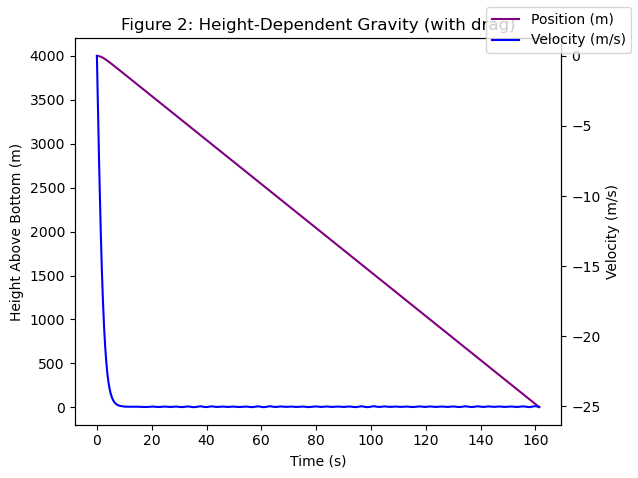

In [3]:
# Question 3 of Part 2:
def grav(r):
    return g0*(r/r_earth)

def equations(t,state):
    y,v = state
    dydt=v 
    dvdt= -grav(y) + (4**-3)*(np.abs(v)**2) 
    return [dydt,dvdt]

r0=r_earth
v0=0

t_span=(0,200) 
t_eval=np.linspace(0,200,1000) 

def hit_bottom(t,state):
    return state[0]-(r_earth-depth)
hit_bottom.terminal=True 
hit_bottom.direction=-1 

soln=solve_ivp(equations,t_span,[r0,v0],t_eval=t_eval,events=hit_bottom)

time=soln.t 
pos = soln.y[0]-(r_earth-depth) 
vel = soln.y[1] 

fig, ax3 = plt.subplots() 
ax4=ax3.twinx() 
ax3.plot(time,pos,label="Position (m)", color="purple") 
ax4.plot(time,vel,label="Velocity (m/s)", color='blue')
ax4.set_ylabel("Velocity (m/s)") 
ax3.set_xlabel("Time (s)") 
ax3.set_ylabel("Height Above Bottom (m)") 
ax3.set_title("Figure 2: Height-Dependent Gravity (with drag)")
fig.legend() 
fig.tight_layout() 

fall_time = soln.t_events[0][0] if soln.t_events[0].size>0 else None

print(f"Time to hit bottom: {fall_time} seconds.") 

print("Incorporating height-dependent gravitational acceleration results in a longer fall time.")
print("The mass experiences less force the deeper it goes into the shaft.")
print("Including drag in the equation increases the fall time by a lot.") 
print("As the object's velocity increases, the drag force increases quadratically which balances gravity.")

Part 3: The Coriolis Force
Maximum transverse displacement: 5.54 m
The test mass hit the wall before reaching the bottom.
Final depth reached: 3997.594371093741


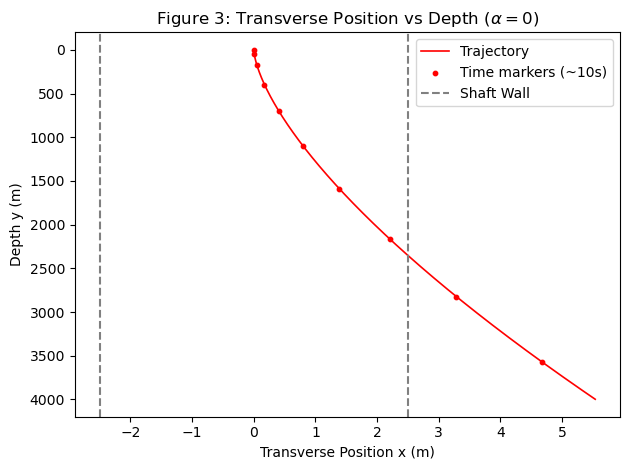

In [4]:
print("Part 3: The Coriolis Force")

# Question 1:

m=1
g0=9.8
omega = 7.272*10**-5
shaft_width = 5
alpha=0
depth_target=4000

def equations (t,state):
    x, vx, y, vy, z, vz = state

    coriolis_x = 2*omega*vy
    coriolis_y = -2 * omega * vx

    dxdt = vx 
    dvxdt = coriolis_x
    dydt = vy 
    dvydt = g0 + coriolis_y
    dzdt = vz 
    dvzdt = 0

    return [dxdt, dvxdt, dydt, dvydt, dzdt, dvzdt]

def hit_bottom(t,state): 
    return state[2]-depth_target
hit_bottom.terminal=True 
hit_bottom.direction=1

# Question 2:

initial_conditions = [0,0,0,0,0,0] 
t_span = (0,300) 
t_eval = np.linspace(*t_span,10000) 

soln = solve_ivp(equations, t_span, initial_conditions,t_eval=t_eval,events=hit_bottom, rtol=1e-8,atol=1e-10) 

t=soln.t 
x=soln.y[0] 
y=soln.y[2] 

if len(soln.t_events[0])>0: 
    event_time=soln.t_events[0][0] 
    mask = t <= event_time

    t=t[mask]
    x=x[mask] 
    y=y[mask]
else:
    print("Test mass did not reach bottom.")

fig, ax4 = plt.subplots() 
ax4.plot(x, y, '-',color='red', linewidth=1.2, label = "Trajectory")
ax4.scatter(x[::100],y[::100],color='red', s=10, label="Time markers (~10s)")
ax4.axvline(2.5,color='gray', linestyle='--',label='Shaft Wall')
ax4.axvline(-2.5, color='gray', linestyle='--')
ax4.set_xlabel("Transverse Position x (m)") 
ax4.set_ylabel("Depth y (m)") 
ax4.set_title("Figure 3: Transverse Position vs Depth ($\\alpha = 0$)")
ax4.invert_yaxis()  
ax4.legend() 
fig.tight_layout() 

# Question 3:

max_x = np.max(np.abs(x)) 
print("Maximum transverse displacement: {:.2f} m".format(max_x)) 
if max_x>shaft_width/2:
    print("The test mass hit the wall before reaching the bottom.") 
else: 
    print("The test mass reached the bottom without hitting the wall.") 

print("Final depth reached:", soln.y[2][-1]) 

Test mass did not reach bottom.
Maximum transverse displacement: 941.81 m
The test mass hit the wall before reaching the bottom.
Final depth reached: -1161.9124527656077


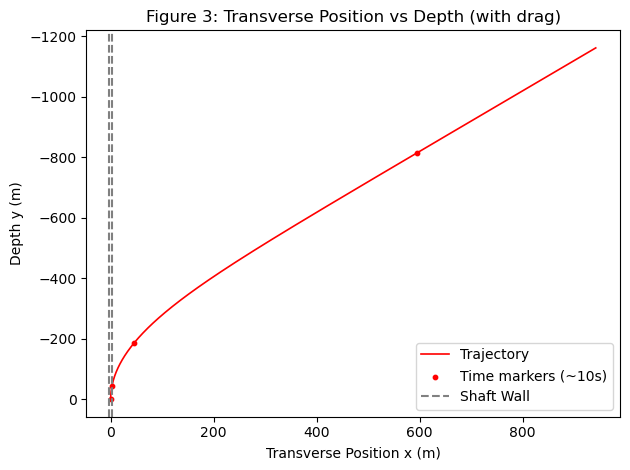

In [5]:
# Question 4 of part 3 
m=1
g0=9.8
omega = 7.272*10**-5
shaft_width = 5
alpha=4e-3
depth_target=4000

def g(y):
    return g0*(1-y/r_earth)

def equations (t,state):
    x, vx, y, vy = state
    v_total=np.sqrt(vx**2+vy**2)

    drag_x = alpha*vx*v_total
    drag_y = alpha*vy*v_total

    ax=-drag_x
    ay=-g(y)-drag_y

    return [vy,ay,vx,ax]

def hit_bottom(t,state): 
    return state[2]-depth_target
hit_bottom.terminal=True 
hit_bottom.direction=1

# Question 2:

initial_conditions = [0,0,0,0] 
t_span = (0,300) 
t_eval = np.linspace(*t_span,10000) 

soln = solve_ivp(equations, t_span, initial_conditions,t_eval=t_eval,events=hit_bottom, rtol=1e-8,atol=1e-10) 

t=soln.t 
x=soln.y[0] 
y=soln.y[2] 

if len(soln.t_events[0])>0: 
    event_time=soln.t_events[0][0] 
    mask = t <= event_time

    t=t[mask]
    x=x[mask] 
    y=y[mask]
else:
    print("Test mass did not reach bottom.")

fig, ax4 = plt.subplots() 
ax4.plot(x, y, '-',color='red', linewidth=1.2, label = "Trajectory")
ax4.scatter(x[::100],y[::100],color='red', s=10, label="Time markers (~10s)")
ax4.axvline(2.5,color='gray', linestyle='--',label='Shaft Wall')
ax4.axvline(-2.5, color='gray', linestyle='--')
ax4.set_xlabel("Transverse Position x (m)") 
ax4.set_ylabel("Depth y (m)") 
ax4.set_title("Figure 3: Transverse Position vs Depth (with drag)")
ax4.invert_yaxis()  
ax4.legend() 
fig.tight_layout() 

# Question 3:

max_x = np.max(np.abs(x)) 
print("Maximum transverse displacement: {:.2f} m".format(max_x)) 
if max_x>shaft_width/2:
    print("The test mass hit the wall before reaching the bottom.") 
else: 
    print("The test mass reached the bottom without hitting the wall.") 

print("Final depth reached:", soln.y[2][-1]) 

Part 4: An Infinitely Deep Mine
Time to reach the center of Earth is 1267.2s (21.1 minutes)
Time to reach the other side of Earth is 2534.4s (42.2 minutes)
Maximum speed at the center is 7906.0 m/s
Orbital speed near Earth's surface is 7905.3m/s
Orbital period near Earth's surface is 5069.4s (84.5 minutes)
Tunnel crossing time is 2534.4s (42.2 minutes)
The tunnel crossing time is half of the orbital period.


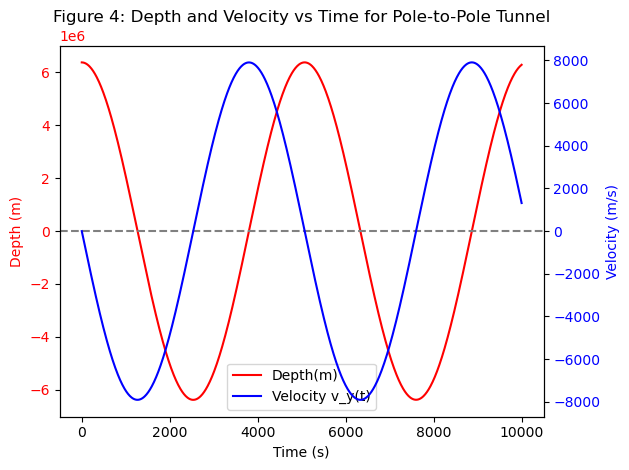

In [6]:
print("Part 4: An Infinitely Deep Mine") 

G = 6.6743*10**-11
M = 5.972*10**24

# Question 1:

def equations(t, state):
    y,vy = state 
    g = g0 * (y/r_earth)

    dydt = vy
    dvydt = -g
    return [dydt, dvydt]

y0=r_earth
v0 = 0
initial_conditions = [y0, v0] 

t_span = (0,10000)
t_eval = np.linspace(*t_span,1000)

soln = solve_ivp(equations, t_span, initial_conditions,t_eval=t_eval)

t = soln.t
y = soln.y[0] 
vy = soln.y[1] 

fig, ax5 = plt.subplots() 
line3=ax5.plot(t, y, color='red', label = 'Depth(m)') 
ax5.set_xlabel("Time (s)") 
ax5.set_ylabel("Depth (m)", color = 'red')
ax5.tick_params(axis = 'y', labelcolor='red') 
ax5.axhline(0,linestyle='--', color='gray',label='Center of Earth')
ax5.set_title("Figure 4: Depth and Velocity vs Time for Pole-to-Pole Tunnel") 

ax6 = ax5.twinx() 
ax6.set_ylabel("Velocity (m/s)", color='blue') 
ax6.tick_params(axis='y', labelcolor='blue') 
line4=ax6.plot(t,vy,label="Velocity v_y(t)", color='blue') 

lines=[line3[0],line4[0]]
labels=[line.get_label() for line in lines]
ax5.legend(lines,labels) 

fig.tight_layout() 

# Question 2:

T = 2*np.pi*np.sqrt(r_earth/g0) 
t_center = T/4 
t_other_side = T/2 
v_max = np.sqrt(g0*r_earth) 

print(f"Time to reach the center of Earth is {t_center:.1f}s ({t_center/60:.1f} minutes)")
print(f"Time to reach the other side of Earth is {t_other_side:.1f}s ({t_other_side/60:.1f} minutes)")
print(f"Maximum speed at the center is {v_max:.1f} m/s")

# Question 3: 

v_orbit=np.sqrt(G*M/r_earth) 
T_orbit = 2*np.pi*r_earth/v_orbit

print(f"Orbital speed near Earth's surface is {v_orbit:.1f}m/s") 
print(f"Orbital period near Earth's surface is {T_orbit:.1f}s ({T_orbit/60:.1f} minutes)")
print(f"Tunnel crossing time is {t_other_side:.1f}s ({t_other_side/60:.1f} minutes)") 
print("The tunnel crossing time is half of the orbital period.")

Part 5: A non-uniform Earth
n=0: Time to center = 4492.61s, Speed at center = 2230.04 m/s
n=1: Time to center = 3887.04s, Speed at center = 2950.06 m/s
n=2: Time to center = 3669.25s, Speed at center = 3436.72 m/s
n=9: Time to center = 3345.60s, Speed at center = 5182.27 m/s


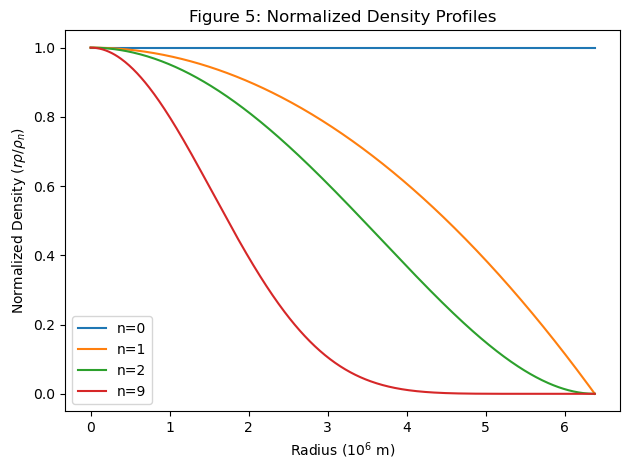

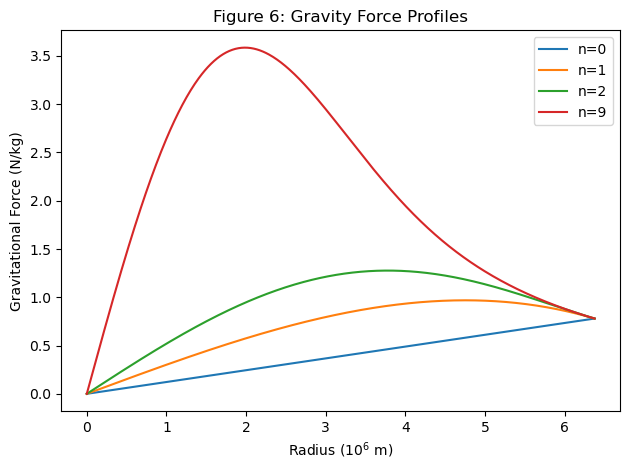

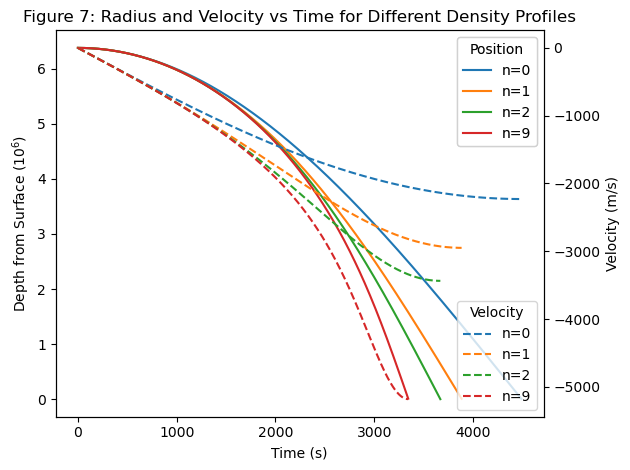

In [7]:
print("Part 5: A non-uniform Earth") 

from scipy.integrate import quad 

def rho_normalized(r,n):
    val=1-(r/r_earth)**2
    return val**n if val >= 0 else 0

def compute_rho_n(n):
    integral, _ = quad(lambda r: rho_normalized(r,n)*r**2,0,r_earth)
    rho_n = M/(4*np.pi*integral)
    return rho_n 

def gravity_force(r,rho_n,n): 
    integrand=lambda r_prime: rho_n*rho_normalized(r_prime,n)*r_prime**2
    mass_inside, _ = quad(integrand,0,r) 
    return G*mass_inside/r**2 if r != 0 else 0

r_values=np.linspace(0,r_earth,500) 
ns=[0,1,2,9] 

fig,ax7=plt.subplots() 
for n in ns: 
    rho_vals = [rho_normalized(r,n) for r in r_values]
    ax7.plot(r_values/1e6,rho_vals,label=f"n={n}") 

ax7.set_xlabel(r"Radius ($10^6$ m)")
ax7.set_ylabel(r"Normalized Density ($r\rho / \rho_n$)") 
ax7.set_title("Figure 5: Normalized Density Profiles")
ax7.legend() 
fig.tight_layout() 

# Question 2: 

fig, ax8 = plt.subplots() 
for n in ns: 
    rho_n = compute_rho_n(n)
    F_vals = [gravity_force(r,rho_n,n) for r in r_values]
    ax8.plot(r_values/1e6, F_vals, label=f"n={n}") 
ax8.set_xlabel(r"Radius ($10^6$ m)")
ax8.set_ylabel("Gravitational Force (N/kg)") 
ax8.set_title("Figure 6: Gravity Force Profiles") 
ax8.legend() 
fig.tight_layout() 

# Question 3: 

times_to_center=[] 
speeds_at_center=[] 
fig, ax9 = plt.subplots() 
ax10=ax9.twinx() 

position_lines=[] 
velocity_lines=[] 

for n in ns: 
    rho_n=compute_rho_n(n) 

    def g(r): 
        if r==0:
            return 0 
        integrand=lambda r_prime: rho_n*rho_normalized(r_prime,n)*r_prime**2
        mass_inside, _ = quad(integrand,0,r) 
        return G * mass_inside/r**2 

    def equations(t,state):
        y,vy = state 
        acc=-g(y) 
        return [vy,acc]

    def reach_center(t,state): 
        return state[0] 
    reach_center.terminal=True
    reach_center.direction=-1 

    y0=r_earth
    v0=0
    soln=solve_ivp(equations, (0,5000), [y0,v0], t_eval=np.linspace(0,5000,1000),events=reach_center,rtol=1e-9,atol=1e-10) 

    t=soln.t 
    y=soln.y[0] 
    vy=soln.y[1] 
    pos_line, = ax9.plot(t,y/1e6, label=f"n={n}") 
    vel_line,=ax10.plot(t,vy,label=f"n={n}",linestyle='--')

    position_lines.append(pos_line) 
    velocity_lines.append(vel_line)

    time_to_center=soln.t_events[0][0] 
    speed_at_center=abs(soln.y_events[0][0][1]) 
    times_to_center.append((n,time_to_center)) 
    speeds_at_center.append((n,speed_at_center)) 

ax9.set_xlabel("Time (s)") 
ax9.set_ylabel(r"Depth from Surface ($10^6$)")
ax9.set_title("Figure 7: Radius and Velocity vs Time for Different Density Profiles")
ax10.set_ylabel("Velocity (m/s)") 

pos_legend=ax9.legend(position_lines, [line.get_label() for line in position_lines],loc='upper right',title="Position")
vel_legend=ax10.legend(velocity_lines,[line.get_label() for line in velocity_lines], loc='lower right', title="Velocity")
ax9.add_artist(pos_legend) 
fig.tight_layout() 

# Question 4: 

for (n,t_c), (_, v_c) in zip(times_to_center, speeds_at_center): 
    print(f"n={n}: Time to center = {t_c:.2f}s, Speed at center = {v_c:.2f} m/s") 
                              

In [8]:
print("Part 6: A Lunar Mine Shaft")
M_moon = 7.35*10**22 
r_moon = 1.7381*10**6

# Question 1:

def g_moon(r): 
    return G*M_moon * r/r_moon**3

def equations(t,state):
    y, vy = state 
    acc = -g_moon(y)
    return [vy,acc]

def reach_center(t,state): 
    return state[0] 
reach_center.terminal=True
reach_center.direction=-1 

y0 = r_moon 
v0=0
initial_conditions = [y0,v0]

soln = solve_ivp(equations, t_span=(0,5000),y0=initial_conditions, events = reach_center,t_eval=np.linspace(0,5000,1000),rtol=1e-9,atol=1e-9) 

time_to_center = soln.t_events[0][0] 
speed_at_center = abs(soln.y_events[0][0][1]) 

print(f"\nTime to reach center of Moon is {time_to_center:.2f} seconds") 
print(f"Speed at center of Moon is {speed_at_center:.2f} m/s") 

# Question 2:

rho_earth = M/((4/3)*np.pi*r_earth**3) 
rho_moon = M_moon / ((4/3)*np.pi*r_moon**3) 

print("Earth density (kg/m^3):", rho_earth) 
print("Moon density (kg/m^3):", rho_moon) 
print("Density ratio (moon/earth):", rho_moon/rho_earth)

# Question 3: 

print("Fall time depends on the density because it scales like 1 over the square root of the density.")
print("This is not a linear relationship.")

Part 6: A Lunar Mine Shaft

Time to reach center of Moon is 1625.12 seconds
Speed at center of Moon is 1680.00 m/s
Earth density (kg/m^3): 5494.867409551201
Moon density (kg/m^3): 3341.753803870318
Density ratio (moon/earth): 0.6081591337511926
Fall time depends on the density because it scales like 1 over the square root of the density.
This is not a linear relationship.
